In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("fcc-forum-pageviews.csv", parse_dates=["date"], index_col="date")
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


In [4]:
# General settings for fonts in plots
title_font = {"fontsize": 18}
labels_font= {"fontsize": 16}

#### Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [5]:
mask = (df.value > df.value.quantile(0.025)) & (df.value < df.value.quantile(0.975))

In [6]:
df = df.loc[mask]

#### Daily page views (line chart)

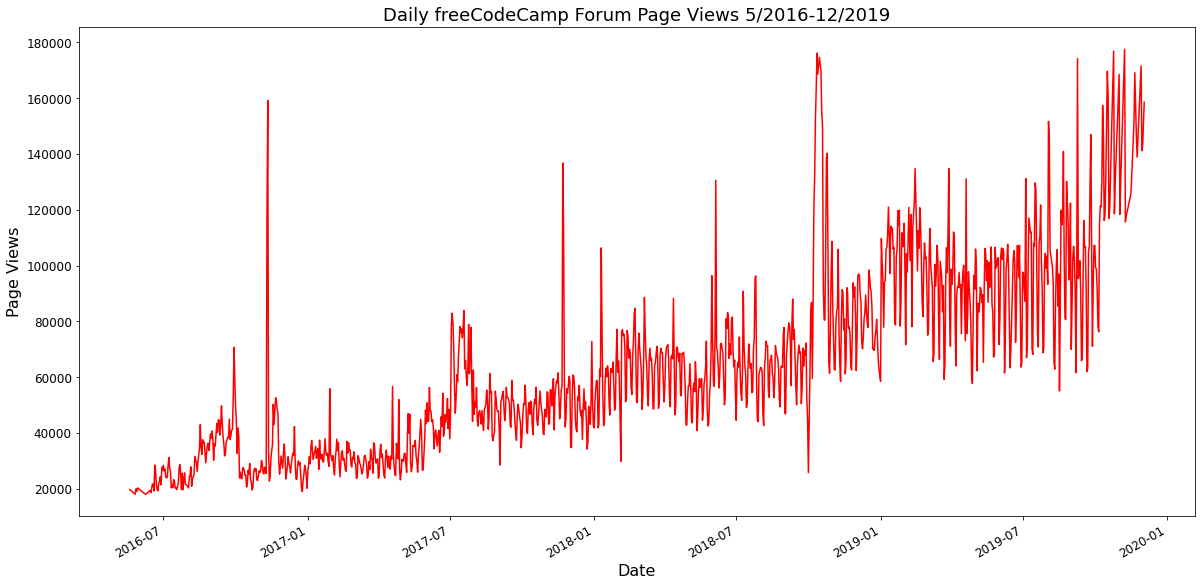

In [7]:
fig,axs = plt.subplots(figsize=(20, 10))

df.plot(ax=axs, fontsize=12, c="r", legend=False)
axs.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019", fontdict=title_font)
axs.set_xlabel("Date", fontdict=labels_font)
axs.set_ylabel("Page Views", fontdict=labels_font)

plt.show()

#### Average daily page views for each month grouped by year bar chart

In [8]:
df_bar = df.resample("M", kind="period").mean().reset_index().copy()
df_bar.head()

,date,value
0,2016-05,19432.400000
1,2016-06,21875.105263
2,2016-07,24109.678571
3,2016-08,31049.193548
4,2016-09,41476.866667


In [9]:
df_bar["year"] = df_bar.date.apply(lambda it: it.strftime("%Y"))
df_bar.head()

,date,value,year
0,2016-05,19432.400000,2016
1,2016-06,21875.105263,2016
2,2016-07,24109.678571,2016
3,2016-08,31049.193548,2016
4,2016-09,41476.866667,2016


In [10]:
df_bar["month"] = df_bar.date.apply(lambda it: it.strftime("%B"))
df_bar.head()

,date,value,year,month
0,2016-05,19432.400000,2016,May
1,2016-06,21875.105263,2016,June
2,2016-07,24109.678571,2016,July
3,2016-08,31049.193548,2016,August
4,2016-09,41476.866667,2016,September


In [11]:
months_order_l = ["January", "February", "March", "April", "May", "June", "July", "August", "September", 
                  "October", "November", "December"]

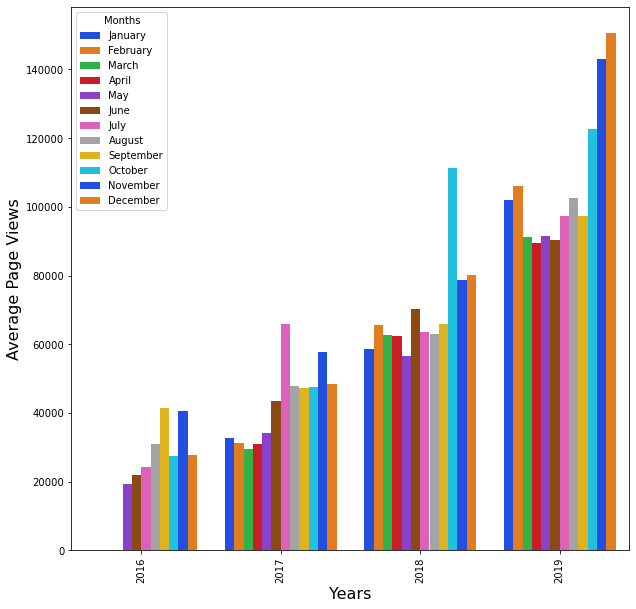

In [12]:
fig, axs = plt.subplots(figsize=(10, 10))

sns.barplot(data=df_bar, x="year", y="value", hue="month", hue_order=months_order_l, palette="bright", ax=axs)
axs.set_xlabel("Years", fontdict=labels_font)
axs.set_ylabel("Average Page Views", fontdict=labels_font)
axs.legend(loc="upper left", title="Months")
plt.xticks(rotation=90)

plt.show()

#### Show how the values are distributed within a given year or month and how it compares over time (box plot)

In [13]:
df_box = df.reset_index().copy()
df_box

,date,value
0,2016-05-19,19736
1,2016-05-26,18060
2,2016-05-27,19997
3,2016-05-28,19044
4,2016-05-29,20325
...,...,...
1233,2019-11-24,138875
1234,2019-11-29,171584
1235,2019-11-30,141161
1236,2019-12-01,142918


In [14]:
df_box["month"] = df_box.date.apply(lambda it: it.strftime("%b"))
df_box.head()

,date,value,month
0,2016-05-19,19736,May
1,2016-05-26,18060,May
2,2016-05-27,19997,May
3,2016-05-28,19044,May
4,2016-05-29,20325,May


In [15]:
df_box["year"] = df_box.date.apply(lambda it: it.strftime("%Y"))
df_box.head()

,date,value,month,year
0,2016-05-19,19736,May,2016
1,2016-05-26,18060,May,2016
2,2016-05-27,19997,May,2016
3,2016-05-28,19044,May,2016
4,2016-05-29,20325,May,2016


In [16]:
months_order_s = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

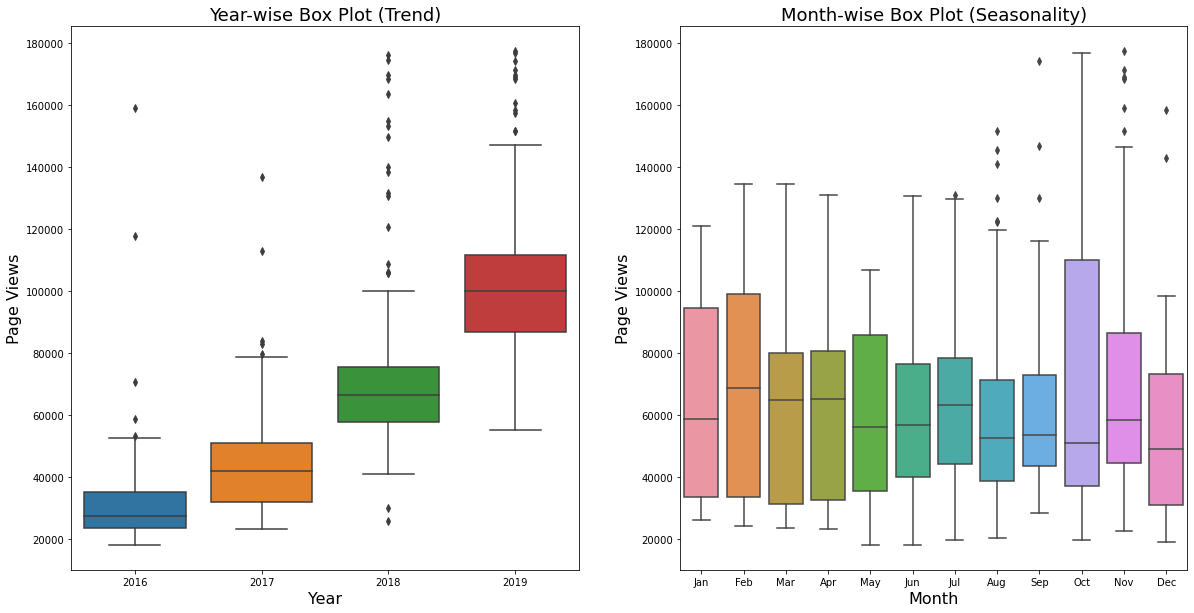

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

sns.boxplot(ax=ax1, data=df_box, x="year", y="value")
ax1.set_title("Year-wise Box Plot (Trend)", fontdict=title_font)
ax1.set_xlabel("Year", fontdict=labels_font)
ax1.set_ylabel("Page Views", fontdict=labels_font)

sns.boxplot(ax=ax2, data=df_box, x="month", y="value", order=months_order_s)
ax2.set_title("Month-wise Box Plot (Seasonality)", fontdict=title_font)
ax2.set_xlabel("Month", fontdict=labels_font)
ax2.set_ylabel("Page Views", fontdict=labels_font)

plt.show()